<a href="https://colab.research.google.com/github/surajpandey11/Deep-learning_Capstone-Project/blob/main/Suraj_pandey_Deep_Learning_Capstone_project_(speech_emotion_recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deep Learning project -(speech emotion recognition)**

In [ ]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Male Neutral

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

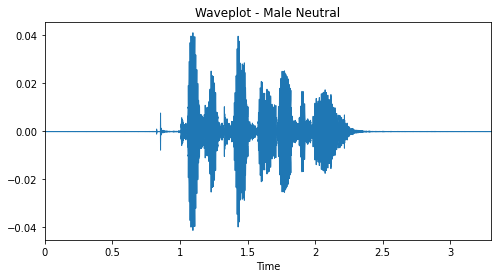

In [ ]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

In [14]:
sound_file = '/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'

In [16]:
Audio(sound_file, autoplay=True)

In [ ]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleNeutral.wav', x, sr)
Audio(data=x, rate=sr)

AttributeError: ignored

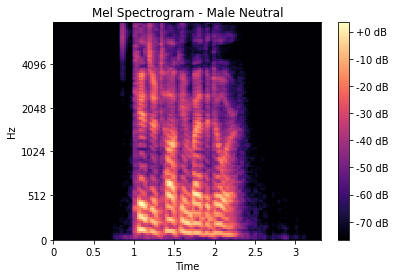

In [ ]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

Female calm

In [12]:
# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-02-02.wav')

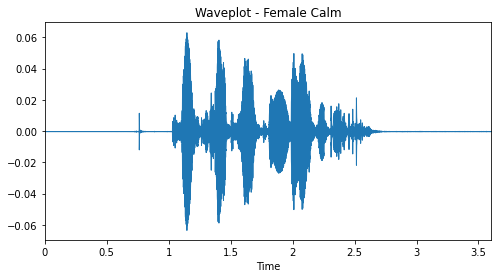

In [17]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

In [23]:
# PLAY AUDIO FILE
soundfile_2=('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-02-02.wav')


In [24]:
Audio(soundfile_2, autoplay=True)

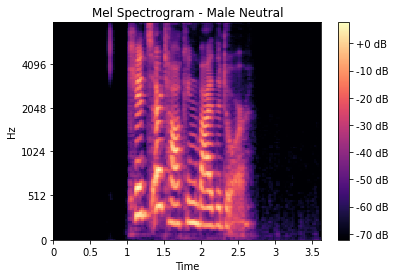

In [25]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

## Male Happy

In [35]:
# LOAD IN FILE
# x, sr = librosa.load('# LOAD IN FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_03/03-01-03-02-01-01-03.wav')

In [36]:
soundfile_3=('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_03/03-01-03-02-01-01-03.wav')

In [34]:
Audio(soundfile_3, autoplay=True)

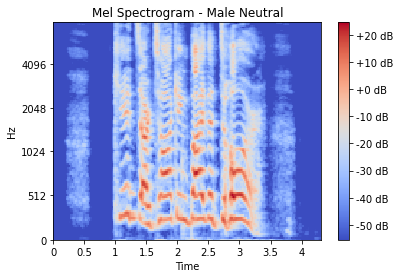

In [37]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

## Female Sad

In [38]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_04/03-01-04-02-02-02-04.wav')


In [39]:
soundfile_3=('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_04/03-01-04-02-02-02-04.wav')

In [40]:
Audio(soundfile_3)

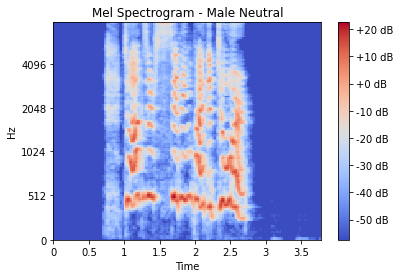

In [41]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

Male Angry

In [44]:
# LOAD FILE
x, sr = librosa.load('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-02-05.wav')


In [45]:
soundfile_4=('/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-02-05.wav')

In [46]:
Audio(soundfile_4)

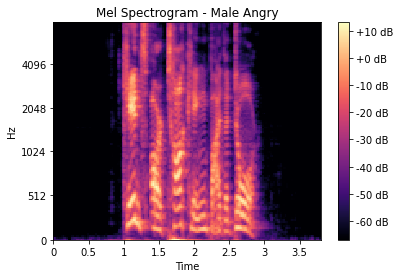

In [47]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');

In [226]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [227]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [228]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,happy,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav
1,male,happy,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-03-02-02-02-01.wav
2,male,neutral,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav
3,male,angry,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-05-01-01-01-01.wav
4,male,calm,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-02-01.wav
...,...,...,...,...
1435,female,surprise,24,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_24/03-01-08-01-02-01-24.wav
1436,female,surprise,24,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_24/03-01-08-01-01-02-24.wav
1437,female,disgust,24,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_24/03-01-07-01-02-02-24.wav
1438,female,surprise,24,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_24/03-01-08-02-02-01-24.wav


In [229]:
def df_subset(df):
  df= df[(df['emotion']=='happy')|(df['emotion']=='sad')|(df['emotion']=='angry')|(df['emotion']=='calm')]
  return df




In [230]:
audio_df=df_subset(audio_df)

In [231]:
audio_df=audio_df.reset_index()

In [232]:
audio_df

,index,gender,emotion,actor,path
0,0,male,happy,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav
1,1,male,happy,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-03-02-02-02-01.wav
2,3,male,angry,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-05-01-01-01-01.wav
3,4,male,calm,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-02-01.wav
4,5,male,calm,1,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-02-01.wav
...,...,...,...,...,...
763,1420,female,sad,24,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_24/03-01-04-02-02-01-24.wav
764,1421,female,happy,24,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_24/03-01-03-01-01-02-24.wav
765,1422,female,calm,24,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_24/03-01-02-01-02-01-24.wav
766,1424,female,angry,24,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_24/03-01-05-02-02-02-24.wav


In [233]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,index,gender,emotion,actor,path
440,821,female,sad,14,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_14/03-01-04-01-01-01-14.wav
101,189,female,calm,4,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_04/03-01-02-01-01-01-04.wav
269,495,male,happy,9,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_09/03-01-03-01-01-01-09.wav
217,396,male,calm,7,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_07/03-01-02-01-01-01-07.wav
191,355,female,happy,6,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_06/03-01-03-01-02-02-06.wav
136,252,male,calm,5,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_05/03-01-02-02-01-02-05.wav
642,1206,male,calm,21,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_21/03-01-02-01-01-01-21.wav
32,60,female,calm,2,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav
386,726,male,happy,13,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_13/03-01-03-01-01-01-13.wav
214,393,male,sad,7,/content/drive/MyDrive/AlmaBetter/Module 7/Week 2/Day 1/audio_speech_actors_01-24/Actor_07/03-01-04-01-02-02-07.wav


In [234]:
len(audio_df)

768

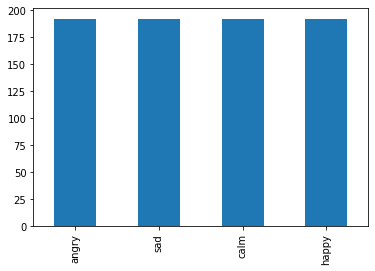

In [235]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [168]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

768


,mel_spectrogram
0,"[-73.08545, -73.06073, -73.085915, -73.12457, -73.108025, -72.65337, -72.549866, -72.89703, -73.12078, -73.12457, -73.113785, -73.01144, -72.9532, -73.06832, -73.12457, -73.03467, -72.99564, -73.04725, -72.94586, -73.058136, -73.12457, -73.12457, -73.12457, -73.07702, -72.8043, -69.65314, -69.21911, -71.91962, -72.160576, -72.68833, -72.868065, -72.87882, -72.91643, -72.915985, -72.4444, -72.66581, -72.6355, -72.61032, -72.47419, -71.706764, -71.65762, -71.75756, -48.666473, -40.95615, -40.452827, -42.667084, -43.889606, -42.839478, -37.71336, -33.119637, -31.746637, -32.33637, -32.4861, -33.12351, -35.113575, -36.38935, -38.98885, -43.86175, -47.502438, -50.25599, -50.25875, -47.561146, -44.007397, -40.805496, -34.942894, -32.564137, -31.203123, -30.8943, -32.14281, -31.747736, -32.78739, -36.987144, -41.524574, -45.368187, -48.73964, -50.793327, -38.86303, -32.177807, -32.574722, -34.50673, -34.53739, -34.818436, -34.998863, -35.118748, -35.15317, -33.08846, -31.035885, -31.212715, -32.803474, -34.173473, -35.749706, -33.753975, -30.796072, -30.043753, -31.57202, -35.48372, -40.222042, -45.091373, -41.942368, -37.47157, ...]"
1,"[-65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43614, -65.43471, -65.42327, -65.31444, -58.960674, -54.502064, -56.45181, -55.395706, -52.12382, -50.853504, -50.254894, -49.951332, -50.150967, -50.32156, -50.84629, -51.57642, -53.01905, -54.49201, -53.025604, -53.254456, -58.77285, -62.759502, -63.40469, -63.115887, -59.924698, -38.994232, -30.926617, -27.069971, -24.16959, -22.520874, -22.608843, -22.973639, -23.60332, -24.398914, -23.686491, -23.068937, -22.703522, -22.549768, -22.51479, -22.340828, -22.775764, -23.70363, -23.304804, -23.83159, -24.787855, -25.655138, -26.453026, -27.207363, -27.278002, -26.784813, -27.30294, -28.470688, -30.522781, -32.26331, -34.785736, -38.520557, -41.775074, -43.928562, -46.052437, -47.231808, -46.96415, -40.265743, -35.858364, -33.815674, -34.212246, -34.37295, -35.48382, -37.564373, -38.764507, -36.612305, -31.831818, -29.847843, -31.577885, -36.02498, -40.044285, -41.14655, -38.876266, -33.41184, -29.559994, -27.543344, -25.895037, -25.193441, ...]"
2,"[-63.53075, -63.54429, -63.54491, -63.56063, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -63.562016, -59.66234, -53.595573, -51.83847, -52.61146, -52.99392, -51.917835, -51.526638, -52.41301, -53.430996, -54.608078, -55.45881, -56.62043, -57.618073, -60.357735, -62.5205, -63.224545, -63.095272, -63.008698, -63.374714, -46.87612, -33.06851, -29.384605, -29.112955, -28.976137, -30.072426, -30.177967, -30.497341, -28.767365, -26.678505, -24.943216, -25.465185, -26.503939, -25.95406, -24.827383, -24.797165, -26.946913, -31.199448, -36.6725, -37.782658, -38.124355, -42.03266, -45.695087, -46.257748, -45.28638, -42.93292, -39.616665, -36.17431, -34.95391, -34.324726, -32.900715, -30.774723, -30.73499, -32.348858, -36.680935, -42.534702, -45.375603, -43.22228, -40.957745, -38.563297, -37.61681, -37.737934, -39.80406, -44.311752, -51.856228, -54.899883, -55.424713, -52.095066, -42.376945, -34.177914, -30.179386, -28.633396, -27.145718, -26.453495, -26.029829, -26.518793, ...]"
3,"[-79.12307, -79.12307, -79.12307, -79.12307, -79.09131, -79.014755, -79.03434, -79.01148, -78.7761, -78.95184, -79.12307, -79.12307, -79.12307, -79.12307, -79.118515, -79.10881, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -79.12307, -78.893616, -77.490425, -78.30809, -79.01049, -79.11681, -79.12307, -79.05406, -79.109474, -78.99845, -79.11315, -78.265396, -74.392555, -70.2233, -70.00303, -73.17284, -72.99737, -54.160786, -47.70413, -4

In [236]:
len(df.iloc[0,0])

256

In [237]:
pd.DataFrame(df['mel_spectrogram'].values.tolist())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,-73.085449,-73.060730,-73.085915,-73.124573,-73.108025,-72.653374,-72.549866,-72.897034,-73.120781,-73.124573,-73.113785,-73.011436,-72.953201,-73.068321,-73.124573,-73.034668,-72.995644,-73.047249,-72.945862,-73.058136,-73.124573,-73.124573,-73.124573,-73.077019,-72.804298,-69.653137,-69.219109,-71.919617,-72.160576,-72.688332,-72.868065,-72.878822,-72.916428,-72.915985,-72.444397,-72.665810,-72.635498,-72.610321,-72.474190,-71.706764,...,-73.124573,-73.124573,-73.124573,-73.124573,-73.116386,-73.106201,-73.107109,-73.105919,-73.108078,-73.123627,-73.047539,-73.124573,-73.124573,-73.124573,-73.124573,-73.124573,-73.124573,-73.124573,-73.061455,-73.062141,-73.020836,-73.122894,-73.124573,-73.124573,-73.006149,-72.940018,-73.124573,-73.124573,-73.124573,-73.124573,-73.123390,-73.124138,-73.013054,-73.007317,-73.011147,-73.019638,-73.046173,NaN,NaN,NaN
1,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.434708,-65.423271,-65.314438,-58.960674,-54.502064,-56.451809,-55.395706,-52.123821,-50.853504,-50.254894,-49.951332,-50.150967,-50.321560,-50.846291,-51.576420,-53.019051,-54.492008,-53.025604,-53.254456,-58.772850,-62.759502,...,-63.173195,-63.891453,-63.391582,-63.431477,-64.277664,-64.694801,-64.467667,-64.665947,-64.769043,-65.148460,-64.442490,-64.504875,-65.152412,-63.919781,-59.123707,-58.261196,-62.977337,-64.923721,-64.549789,-59.783955,-59.829288,-64.600304,-65.347900,-65.243355,-65.298515,-65.411354,-65.436142,-65.383911,-65.183029,-65.181114,-65.204369,-65.301666,-65.254051,-65.217865,-65.097458,-65.243256,-65.436142,-65.436142,-65.393250,-65.153008
2,-63.530750,-63.544289,-63.544910,-63.560631,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-59.662338,-53.595573,-51.838470,-52.611462,-52.993919,-51.917835,-51.526638,-52.413010,-53.430996,-54.608078,-55.458809,-56.620430,-57.618073,-60.357735,-62.520500,...,-63.348553,-63.491299,-63.392529,-63.370060,-63.248325,-63.373871,-63.459225,-63.503265,-63.559460,-63.531254,-63.559052,-63.543125,-63.562016,-63.562016,-63.486179,-63.516441,-63.562016,-63.553734,-63.461105,-63.426105,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016
3,-79.123070,-79.123070,-79.123070,-79.123070,-79.091309,-79.014755,-79.034340,-79.011482,-78.776100,-78.951843,-79.123070,-79.123070,-79.123070,-79.123070,-79.118515,-79.108810,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-78.893616,-77.490425,-78.308090,-79.010490,-79.116814,-79.123070,-79.054062,-79.109474,-78.998451,-79.113152,-78.265396,-74.392555,-70.223297,-70.003029,-73.172836,...,-53.164566,-53.474270,-52.906174,-52.758068,-53.631271,-53.456764,-54.692814,-56.123707,-58.018780,-59.067822,-60.342297,-61.600819,-62.314831,-64.479645,-67.091492,-66.708794,-67.360649,-69.290688,-71.702148,-71.868073,-73.862366,-74.499893,-75.169685,-76.949120,-76.754730,-76.180046,-75.553680,-78.220917,-78.755013,-78.783279,-76.827232,-76.330719,-77.452370,-78.737572,-78.957672,-78.833160,-79.080887,-79.123070,-79.123070,-79.123070
4,-80.098557,-80.098557,-80.065262,-80.004250,-80.098557,-80.098557,-80.098557,-80.098557,-80.098557,-80.098557,-80.098557,-79.995781,-79.396835,-79.340004,-79.409676,-76.947220,-65.193520,-62.623123,-6

In [238]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [239]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [240]:
df_combined.drop(columns='index',inplace=True)

In [241]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,male,happy,1,-73.085449,-73.060730,-73.085915,-73.124573,-73.108025,-72.653374,-72.549866,-72.897034,-73.120781,-73.124573,-73.113785,-73.011436,-72.953201,-73.068321,-73.124573,-73.034668,-72.995644,-73.047249,-72.945862,-73.058136,-73.124573,-73.124573,-73.124573,-73.077019,-72.804298,-69.653137,-69.219109,-71.919617,-72.160576,-72.688332,-72.868065,-72.878822,-72.916428,-72.915985,-72.444397,-72.665810,-72.635498,...,-73.124573,-73.124573,-73.124573,-73.124573,-73.116386,-73.106201,-73.107109,-73.105919,-73.108078,-73.123627,-73.047539,-73.124573,-73.124573,-73.124573,-73.124573,-73.124573,-73.124573,-73.124573,-73.061455,-73.062141,-73.020836,-73.122894,-73.124573,-73.124573,-73.006149,-72.940018,-73.124573,-73.124573,-73.124573,-73.124573,-73.123390,-73.124138,-73.013054,-73.007317,-73.011147,-73.019638,-73.046173,0.000000,0.000000,0.000000
1,male,happy,1,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.436142,-65.434708,-65.423271,-65.314438,-58.960674,-54.502064,-56.451809,-55.395706,-52.123821,-50.853504,-50.254894,-49.951332,-50.150967,-50.321560,-50.846291,-51.576420,-53.019051,-54.492008,-53.025604,...,-63.173195,-63.891453,-63.391582,-63.431477,-64.277664,-64.694801,-64.467667,-64.665947,-64.769043,-65.148460,-64.442490,-64.504875,-65.152412,-63.919781,-59.123707,-58.261196,-62.977337,-64.923721,-64.549789,-59.783955,-59.829288,-64.600304,-65.347900,-65.243355,-65.298515,-65.411354,-65.436142,-65.383911,-65.183029,-65.181114,-65.204369,-65.301666,-65.254051,-65.217865,-65.097458,-65.243256,-65.436142,-65.436142,-65.393250,-65.153008
2,male,angry,1,-63.530750,-63.544289,-63.544910,-63.560631,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-59.662338,-53.595573,-51.838470,-52.611462,-52.993919,-51.917835,-51.526638,-52.413010,-53.430996,-54.608078,-55.458809,-56.620430,...,-63.348553,-63.491299,-63.392529,-63.370060,-63.248325,-63.373871,-63.459225,-63.503265,-63.559460,-63.531254,-63.559052,-63.543125,-63.562016,-63.562016,-63.486179,-63.516441,-63.562016,-63.553734,-63.461105,-63.426105,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016,-63.562016
3,male,calm,1,-79.123070,-79.123070,-79.123070,-79.123070,-79.091309,-79.014755,-79.034340,-79.011482,-78.776100,-78.951843,-79.123070,-79.123070,-79.123070,-79.123070,-79.118515,-79.108810,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-79.123070,-78.893616,-77.490425,-78.308090,-79.010490,-79.116814,-79.123070,-79.054062,-79.109474,-78.998451,-79.113152,-78.265396,-74.392555,...,-53.164566,-53.474270,-52.906174,-52.758068,-53.631271,-53.456764,-54.692814,-56.123707,-58.018780,-59.067822,-60.342297,-61.600819,-62.314831,-64.479645,-67.091492,-66.708794,-67.360649,-69.290688,-71.702148,-71.868073,-73.862366,-74.499893,-75.169685,-76.949120,-76.754730,-76.180046,-75.553680,-78.220917,-78.755013,-78.783279,-76.827232,-76.330719,-77.452370,-78.737572,-78.957672,-78.833160,-79.080887,-79.123070,-79.123070,-79.123070
4,male,calm,1,-80.098557,-80.098557,-80.065262,-80.004250,-80.098557,-80.098557,-80.098557,-80.098557,-80.098557,-80.098557,-80.098557,-79.995781,-79.396835,-79.340004,-79.409676,-76.947220,-65.193520,-62.623123,-69.102180,-74.596870,-66.692116,-55.468781,

In [242]:
len(df_combined)

768

In [243]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [244]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)
print(y_train.shape)

(614, 259)
(614, 1)


In [245]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)
print(y_test.shape)

(154, 259)
(154, 1)


In [246]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(154, 259)


In [247]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [248]:
len(y_train)


614

In [249]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_train[0:10])

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [250]:
np.unique(y_test)

array([0., 1.], dtype=float32)

In [251]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(614, 259, 1)

In [219]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [252]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 250, 64)           704       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 30, 128)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 2, 128)           

In [253]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])



Epoch 1/40
20/20 [==============================] - 3s 132ms/step - loss: 5.4790 - accuracy: 0.2390 - val_loss: 1.9019 - val_accuracy: 0.3377

Epoch 00001: val_accuracy improved from -inf to 0.33766, saving model to best_initial_model.hdf5
Epoch 2/40
20/20 [==============================] - 2s 120ms/step - loss: 1.8719 - accuracy: 0.2926 - val_loss: 1.7451 - val_accuracy: 0.2792

Epoch 00002: val_accuracy did not improve from 0.33766
Epoch 3/40
20/20 [==============================] - 2s 118ms/step - loss: 1.7292 - accuracy: 0.3175 - val_loss: 1.5811 - val_accuracy: 0.5000

Epoch 00003: val_accuracy improved from 0.33766 to 0.50000, saving model to best_initial_model.hdf5
Epoch 4/40
20/20 [==============================] - 2s 119ms/step - loss: 1.5829 - accuracy: 0.4073 - val_loss: 1.6039 - val_accuracy: 0.2792

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/40
20/20 [==============================] - 2s 118ms/step - loss: 1.4988 - accuracy: 0.4181 - val_loss: 1.4164 - 

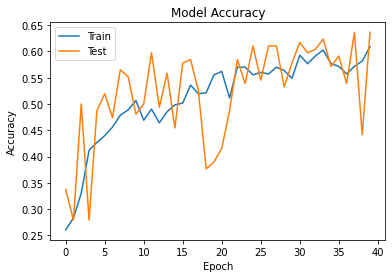

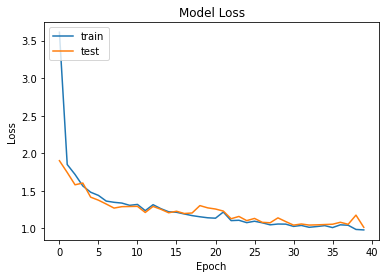

In [254]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

In [255]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

5/5 [==============================] - 0s 28ms/step - loss: 1.0146 - accuracy: 0.6364
Loss of the model is -  1.014552116394043
5/5 [==============================] - 0s 29ms/step - loss: 1.0146 - accuracy: 0.6364
Accuracy of the model is -  63.63636255264282 %


In [256]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,angry,happy
141,calm,calm
142,calm,calm
143,calm,calm
144,sad,sad
145,sad,angry
146,happy,happy
147,angry,happy
148,angry,angry
149,angry,angry


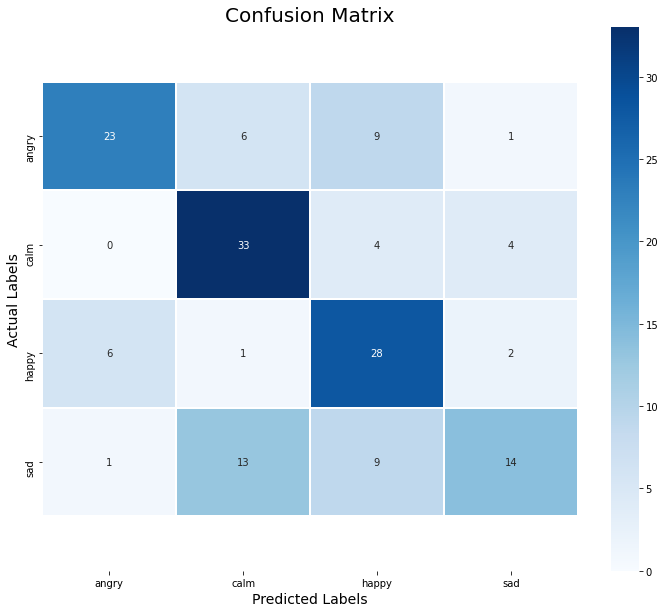

In [257]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [259]:
print(classification_report(actual, predictions, target_names = ['angry','calm','happy','sad']))

              precision    recall  f1-score   support

       angry       0.77      0.59      0.67        39
        calm       0.62      0.80      0.70        41
       happy       0.56      0.76      0.64        37
         sad       0.67      0.38      0.48        37

    accuracy                           0.64       154
   macro avg       0.65      0.63      0.62       154
weighted avg       0.65      0.64      0.63       154

